# Importation des librairies

In [34]:
# !pip install category_encoders wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

# Chargement des données

In [35]:
dataset = pd.read_csv('newDataset.csv', encoding='cp1252')

In [36]:
dataset.isna().sum()

sentence    0
word        0
label       0
dtype: int64

In [37]:
temp = dataset.groupby('label').count()['word'].reset_index().sort_values(by='word', ascending=False)  
temp

,label,word
1,1,344
0,0,280


In [38]:
dataset['wordLen'] = dataset['word'].str.len()

dataset.head(10)

,sentence,word,label,wordLen
0,Recent archaeological evidence may indicate an...,Recent,0,6
1,Recent archaeological evidence may indicate an...,archaeological,1,14
2,Recent archaeological evidence may indicate an...,evidence,0,8
3,Recent archaeological evidence may indicate an...,indicate,0,8
4,Recent archaeological evidence may indicate an...,Edomite,1,7
5,Recent archaeological evidence may indicate an...,controversial,1,13
6,Resistance exercise consisted of eight sets of...,Resistance,0,10
7,Resistance exercise consisted of eight sets of...,consisted,0,9
8,Resistance exercise consisted of eight sets of...,1RM,1,3
9,"At the end of the 20th century , scientists di...",dyslexic,1,8


In [39]:
dataset.shape

(624, 4)

#  Categorizing and Tagging Words

In [40]:
dataset["termTag"]=""
i = 0
for term in dataset["word"]:
    text = word_tokenize(term)
    x = nltk.pos_tag(text)    
    
    for j in range (len(x)):
        print(i)
        print(term + x[j][1])
        dataset["termTag"][i] =dataset["termTag"][i] + x[j][1]
        
    i = i + 1

0
RecentNN
1
archaeologicalJJ
2
evidenceNN
3
indicateNN
4
EdomiteNN
5
controversialJJ
6
ResistanceNN
7
consistedVBN
8
1RMCD
9
dyslexicNN
10
dyslexiaNN
11
scientistsNNS
12
researchNN
13
centuryNN
14
revitalizedVBN
15
revivalNN
16
luteNN
17
interestNN
18
composersNNS
19
luteNN
20
instrumentsNNS
21
gripperNN
22
designNN
23
archaeologicalJJ
24
evidenceNN
25
EdomiteNN
26
nationNN
27
controversialJJ
28
centuryNN
29
topicNN
30
speciesNNS
31
bipedalNN
32
locomotionNN
33
extraordinaryJJ
34
habitNN
35
RadiometricJJ
36
techniqueNN
37
materialsNNS
38
abundanceNN
39
radioactiveNN
40
isotopeNN
41
decayNN
42
comparisonNN
43
HistoricallyRB
44
MediterraneanNN
45
climatesNNS
46
worshippersNNS
47
associationNN
48
individualsNNS
49
agreementNN
50
NorthernNNP
51
AgreementNN
52
BelfastNN
53
peaceNN
54
songsNNS
55
accustomedVBN
56
eccentricJJ
57
playersNNS
58
DNANN
59
adenineNN
60
thymineNN
61
nucleicNN
62
structuresNNS
63
functionsNNS
64
acquireVB
65
knowledgeNN
66
userNN
67
BacterialJJ
68
contaminantsNNS
6

C:\Users\F3D54~1.AMI\AppData\Local\Temp/ipykernel_19872/3629152273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["termTag"][i] =dataset["termTag"][i] + x[j][1]


190
tourismNN
191
choirNN
192
recordingsNNS
193
broadcastsNNS
194
iridescentNN
195
SceloporusNN
196
loanNN
197
artistsNNS
198
alteredVBN
199
censoredVBN
200
radicalJJ
201
tuningVBG
202
redressingVBG
203
latterNN
204
changeNN
205
fundamentalsNNS
206
alteringVBG
207
progradeNN
208
rotatorNN
209
directionNN
210
ambiguousJJ
211
ThymineNN
212
DNANN
213
AdenineNN
214
amountNN
215
roughlyRB
216
discoveredVBN
217
EarthNN
218
nitrogenNN
219
anabolicNN
220
studyNN
221
myofibrillarNN
222
synthesisNN
223
humansNNS
224
strenuousJJ
225
exerciseNN
226
anabolicNN
227
trainingNN
228
muscularNN
229
ingestionNN
230
proteinNN
231
anabolicNN
232
muscleNN
233
nutrientNN
234
researchNN
235
anabolismNN
236
RhynieNNP
237
fungusNN
238
lichenNN
239
plantNN
240
parodyingVBG
241
stereotypicalJJ
242
animosityNN
243
elephantsNNS
244
friendNN
245
anoxicNN
246
geologicalJJ
247
pastNN
248
antimicrobialJJ
249
resistantNN
250
metagenomicsNNS
251
foodNN
252
snoutNN
253
termitesNNS
254
locateNN
255
atrophyNN
256
subsequent

In [41]:
dataset.head(10)

,sentence,word,label,wordLen,termTag
0,Recent archaeological evidence may indicate an...,Recent,0,6,NN
1,Recent archaeological evidence may indicate an...,archaeological,1,14,JJ
2,Recent archaeological evidence may indicate an...,evidence,0,8,NN
3,Recent archaeological evidence may indicate an...,indicate,0,8,NN
4,Recent archaeological evidence may indicate an...,Edomite,1,7,NN
5,Recent archaeological evidence may indicate an...,controversial,1,13,JJ
6,Resistance exercise consisted of eight sets of...,Resistance,0,10,NN
7,Resistance exercise consisted of eight sets of...,consisted,0,9,VBN
8,Resistance exercise consisted of eight sets of...,1RM,1,3,CD
9,"At the end of the 20th century , scientists di...",dyslexic,1,8,NN


# Calculating the frequence of a word in wikipedia articles

In [42]:
import re
import urllib.request
from collections import Counter

def frequenceWiki(term):
    
    termWithoutSpace = term.replace(" " , "")
    URL = 'https://simple.wikipedia.org/wiki/Special:Search?search='+termWithoutSpace

    counter = Counter()

    with urllib.request.urlopen(URL) as source:
        for line in source:
            words = re.split(r"[^A-Z]+", line.decode('utf-8'), flags=re.I)
            counter.update(words)
    return counter[term]

In [43]:
# termCountWiki = []
i=0
dataset["termFreqWiki"]=0
for term in dataset["word"]:
    n = frequenceWiki(term)
    dataset["termFreqWiki"][i] = n
    i = i+1
#     print(term)
    print(i)
    
dataset.head(10)

C:\Users\F3D54~1.AMI\AppData\Local\Temp/ipykernel_19872/2476858575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["termFreqWiki"][i] = n


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,sentence,word,label,wordLen,termTag,termFreqWiki
0,Recent archaeological evidence may indicate an...,Recent,0,6,NN,32
1,Recent archaeological evidence may indicate an...,archaeological,1,14,JJ,6
2,Recent archaeological evidence may indicate an...,evidence,0,8,NN,6
3,Recent archaeological evidence may indicate an...,indicate,0,8,NN,90
4,Recent archaeological evidence may indicate an...,Edomite,1,7,NN,21
5,Recent archaeological evidence may indicate an...,controversial,1,13,JJ,1
6,Resistance exercise consisted of eight sets of...,Resistance,0,10,NN,59
7,Resistance exercise consisted of eight sets of...,consisted,0,9,VBN,39
8,Resistance exercise consisted of eight sets of...,1RM,1,3,CD,0
9,"At the end of the 20th century , scientists di...",dyslexic,1,8,NN,7


D:\Program Files (x86)\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


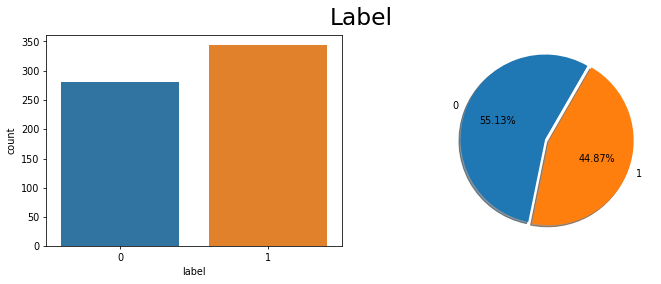

In [44]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4), dpi=70)
sns.countplot(dataset['label'], ax=axes[0])
axes[1].pie(dataset['label'].value_counts(),
            labels=["0", "1"],
            autopct='%1.2f%%',
            shadow=True,
            explode=(0.05, 0),
            startangle=60)
fig.suptitle('Label', fontsize=24)
plt.show()

Text(0.5, 1.0, 'Complex words')

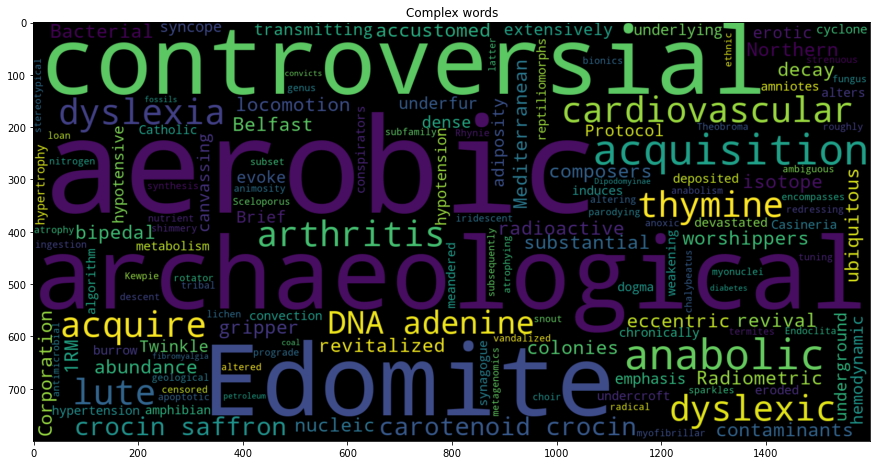

In [45]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.label == 1].word))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Complex words')

Text(0.5, 1.0, 'Simple words')

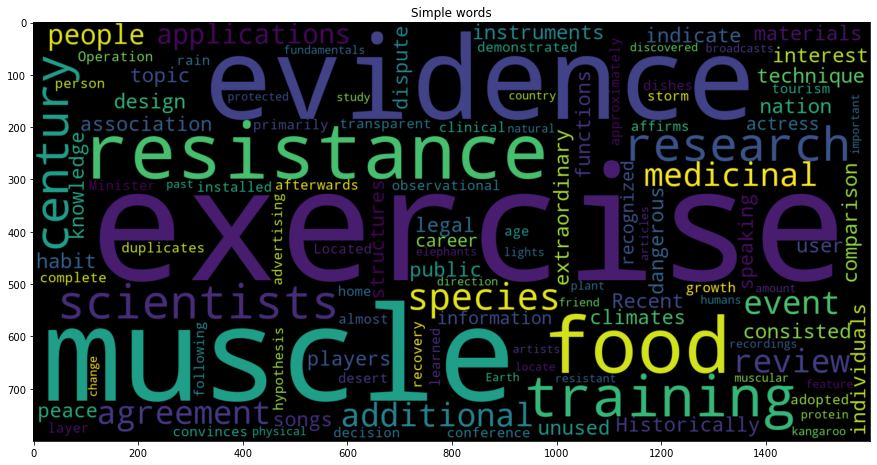

In [46]:
from wordcloud import WordCloud
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.label == 0].word))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Simple words')

# Vectorisation

In [47]:
import category_encoders as ce
import pandas as pd


#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['word','termTag'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

data = encoder.fit_transform(dataset)
data

,sentence,word_Recent,word_archaeological,word_evidence,word_indicate,word_Edomite,word_controversial,word_Resistance,word_consisted,word_1RM,...,termTag_NN,termTag_JJ,termTag_VBN,termTag_CD,termTag_NNS,termTag_RB,termTag_NNP,termTag_VB,termTag_VBG,termFreqWiki
0,Recent archaeological evidence may indicate an...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
1,Recent archaeological evidence may indicate an...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,Recent archaeological evidence may indicate an...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,Recent archaeological evidence may indicate an...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
4,Recent archaeological evidence may indicate an...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Resistance training may be effective for reduc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46
620,Exercise and physical activity are increasingl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
621,Exercise and physical activity are increasingl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,103
622,Exercise and physical activity are increasingl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22


# Data splitting

In [48]:
from sklearn.model_selection import train_test_split
X = data.drop(["label", "sentence"],axis = 1)
Y = data.label
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (499, 275)
y_train :  (499,)
x_test :  (125, 275)
y_test :  (125,)


In [205]:
#x_train
#y_train

In [206]:
# train_x = pd.get_dummies(x_train)
# test_x =  pd.get_dummies(x_test)
# print(train_x.shape)
#x_test

# SVM 

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train, y_train)


y_pred = grid.predict(x_test)
ypred = pd.DataFrame(y_pred)
report = classification_report(y_test, ypred)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=  10.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   8.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.590 total time=   7.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.585 total time=   7.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.591 total time=   7.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.580 total time=   7.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   7.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   7.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.578 total time=   8.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   8.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.580 total time=   9.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.669 total time=   7.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.641 total time=   6.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   7.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.671 total time=   6.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   6.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.669 total time=   7.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.641 total time=   6.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.650 total time=   7.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.671 total time=   6.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   7.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.669 total time=   6.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.641 total time=   6.7s
[CV 4/5] END ....C=1000, gam

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [50]:
from sklearn import svm
from sklearn.metrics import classification_report
model = svm.SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
ypred = pd.DataFrame(y_pred)
report = classification_report(y_test, ypred)


In [57]:
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [59]:
pd.crosstab(y_test,y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,286,4
1,187,59


# logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred_lg = model.predict(x_test)
ypred = pd.DataFrame(y_pred_lg)
report = classification_report(y_test, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       290
           1       0.94      0.24      0.38       246

    accuracy                           0.64       536
   macro avg       0.77      0.61      0.57       536
weighted avg       0.76      0.64      0.58       536



In [68]:
pd.crosstab(y_test,y_pred_lg, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,286,4
1,187,59


# Modelisation

In [49]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [50]:
def evaluation(model):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [51]:
# preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [52]:
RandomForest = make_pipeline( RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline( AdaBoostClassifier(random_state=0))
SVM = make_pipeline( StandardScaler(), SVC(random_state=0))
KNN = make_pipeline( StandardScaler(), KNeighborsClassifier())

In [53]:
dict_of_models = {'SVM': SVM,
                'RandomForest': RandomForest,
                'AdaBoost' : AdaBoost,
                    
                  'KNN': KNN
                 }

SVM
[[63  2]
 [ 6 54]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.96      0.90      0.93        60

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.94       125
weighted avg       0.94      0.94      0.94       125

RandomForest
[[51 14]
 [ 0 60]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        65
           1       0.81      1.00      0.90        60

    accuracy                           0.89       125
   macro avg       0.91      0.89      0.89       125
weighted avg       0.91      0.89      0.89       125

AdaBoost
[[27 38]
 [10 50]]
              precision    recall  f1-score   support

           0       0.73      0.42      0.53        65
           1       0.57      0.83      0.68        60

    accuracy                           0.62       125
   macro avg       0.65      0.62      0.60  

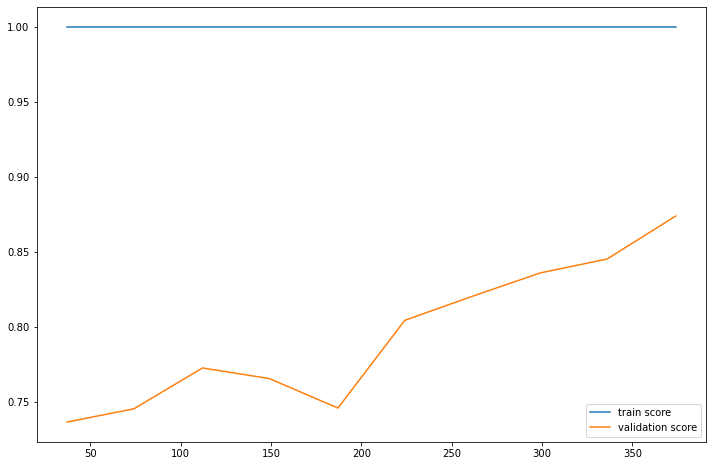

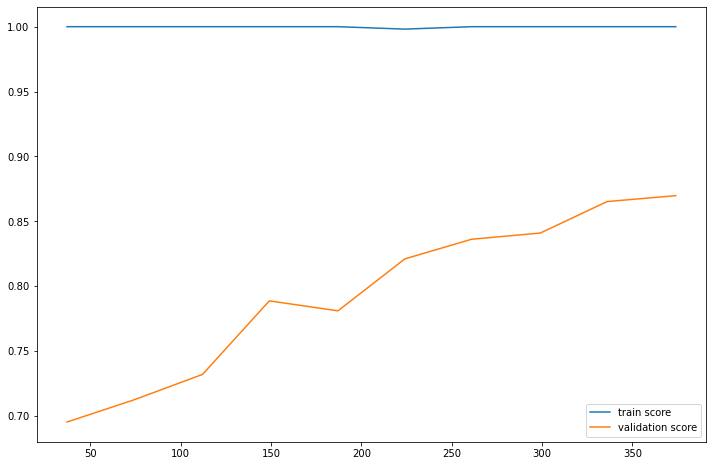

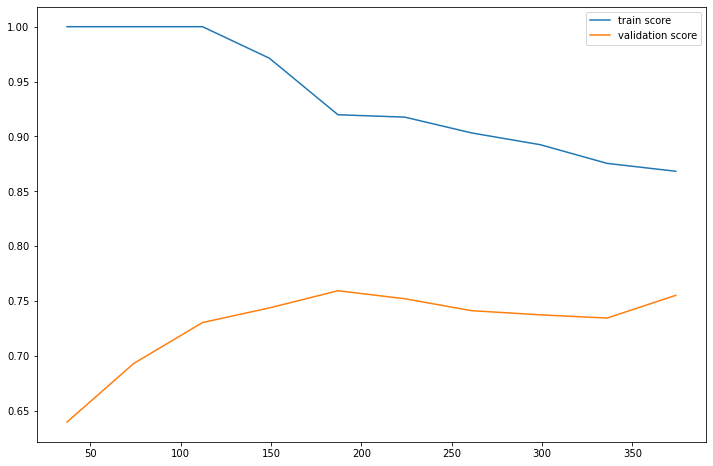

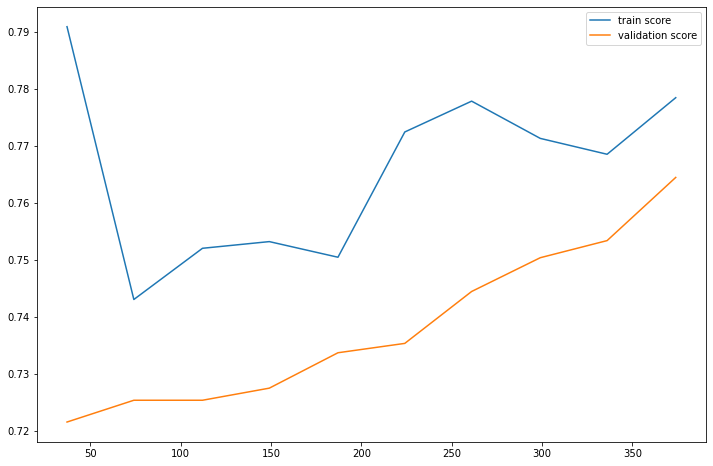

In [54]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)